# Reducing a Chain Event Graph

A complete CEG shows all possible trajectories that an individual undergoing the process might experience. However, on observing any evidence, certain or uncertain, some edges and nodes become unvisited with probability 1. The CEG model can be reduced such that these edges and nodes are excluded, without any loss of information. Once reduced, the probabilities displayed can be also be revised.

For this example, we will use the `falls.xlsx` dataset.

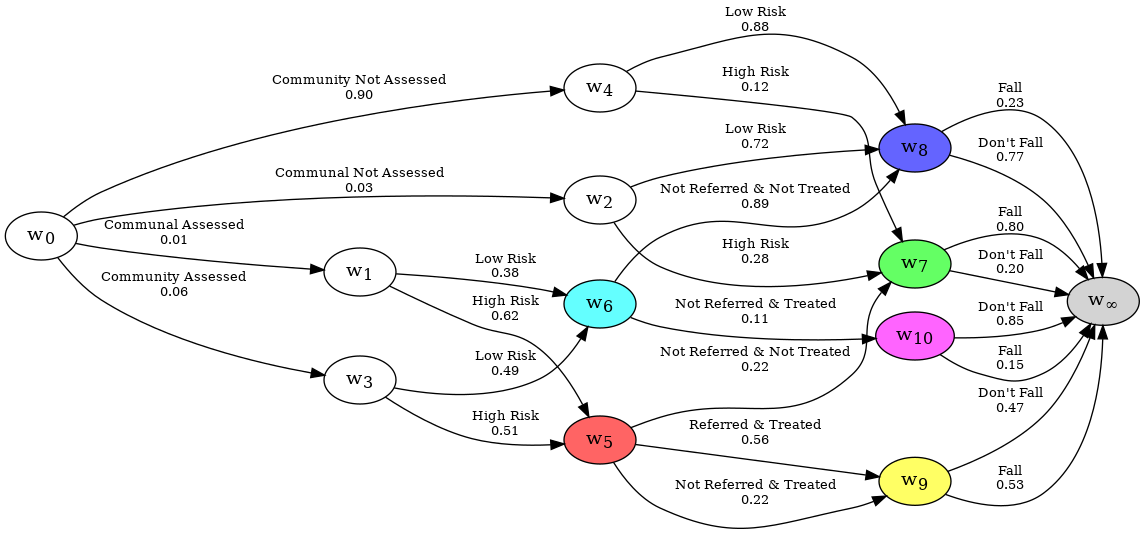

In [30]:
from cegpy import StagedTree, ChainEventGraph, ChainEventGraphReducer
import pandas as pd

dataframe = pd.read_excel("falls.xlsx")

staged_tree = StagedTree(dataframe)
staged_tree.calculate_AHC_transitions()

falls_ceg = ChainEventGraph(staged_tree)
falls_ceg.create_figure()

When examining a dataset with a CEG, you may wish to see a subset of the graph, where some events are excluded with probability zero. Consider the CEG representation of the falls dataset; It may be interesting to split the graph into two graphs, one for individuals on the `Communal` paths, and another for people on the `Community` paths. This is achieved by using uncertain evidence. In our case, we know that anyone who is community assessed will have either passed along the `Community Not Assessed` edge or the `Community Assessed` edge, which can be done like so:

In [31]:
from cegpy import ChainEventGraphReducer

reducer = ChainEventGraphReducer(falls_ceg)
reducer.add_uncertain_edge_set(
    edge_set={
        ("w0", "w4", "Community Not Assessed"),
        ("w0", "w3", "Community Assessed"),
    }
)
print(reducer)

The evidence you have given is as follows:
 Evidence you are certain of:
   Edges = []
   Nodes = {}
 Evidence you are uncertain of:
   Edges = [
     {('w0', 'w4', 'Community Not Assessed'), ('w0', 'w3', 'Community Assessed')},
   ]
   Nodes = {
   }




The reduced graph is stored in the `graph` attribute, and is a `ChainEventGraph` object.

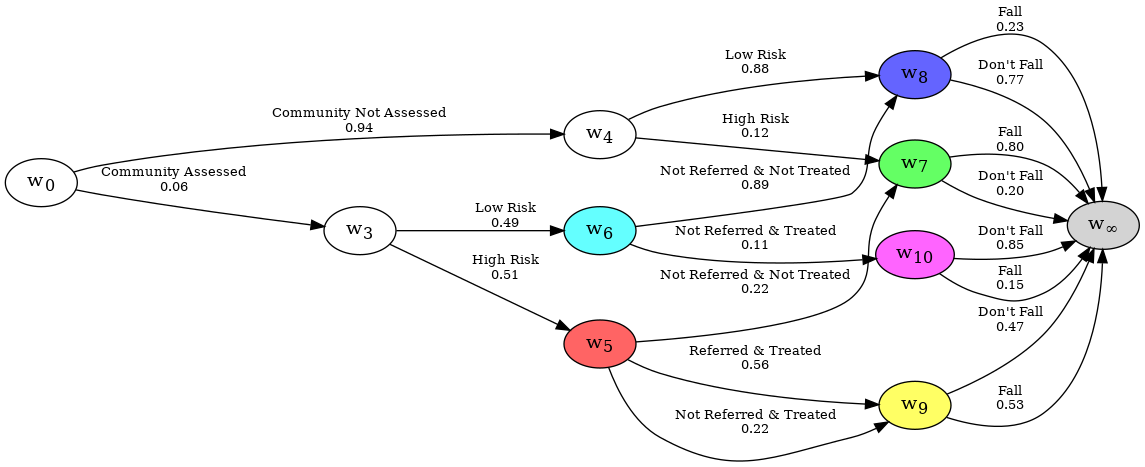

In [32]:
reducer.graph.create_figure()

Likewise, we can do the same for the `Communal` graph. In this case, it could be simpler to just specify the sub-graph which contains all paths that pass through nodes w<SUB>1</SUB> and w<SUB>2</SUB>.

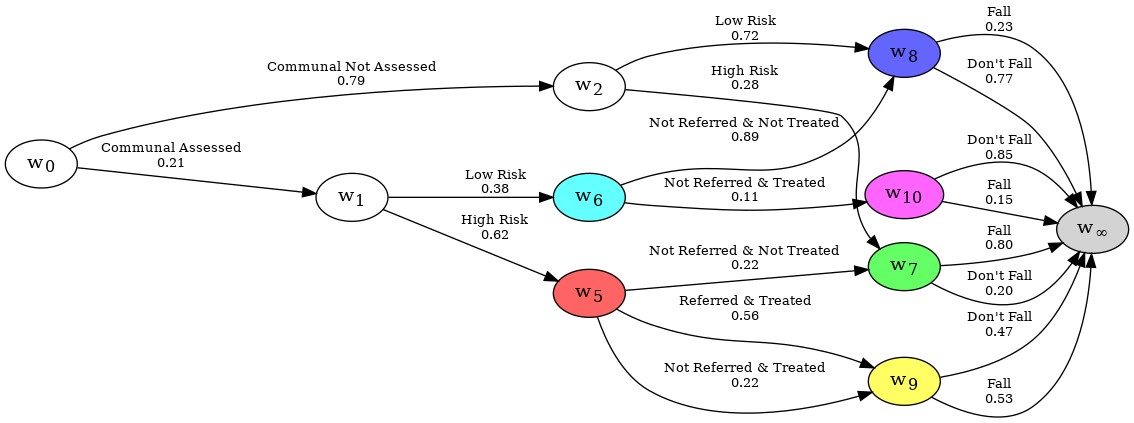

In [33]:
reducer = ChainEventGraphReducer(falls_ceg)
reducer.add_uncertain_node_set({"w1", "w2"})
reducer.graph.create_figure()

It may also be interesting to see the sub-graph of those `Communal` individuals who had a `Fall`.

In [34]:
reducer.add_uncertain_edge_set(
    {
        (u, v, l) 
        for (u, v, l) in reducer.graph.edges 
        if l == "Fall"
    }
)
print(reducer)

The evidence you have given is as follows:
 Evidence you are certain of:
   Edges = []
   Nodes = {}
 Evidence you are uncertain of:
   Edges = [
     {('w8', 'w_infinity', 'Fall'), ('w10', 'w_infinity', 'Fall'), ('w9', 'w_infinity', 'Fall'), ('w7', 'w_infinity', 'Fall')},
   ]
   Nodes = {
     {'w1', 'w2'},
   }




The probabilities are adjusted across all the edges, and back propagated through the graph automatically.

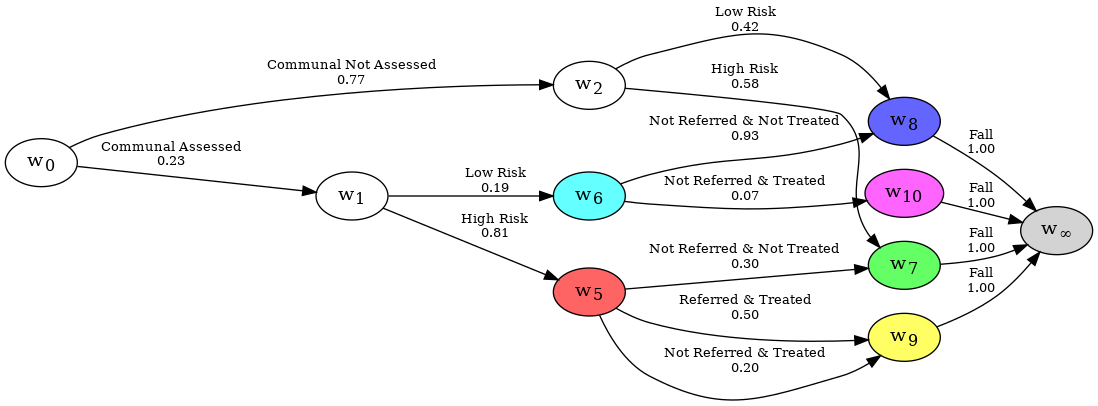

In [35]:
reducer.graph.create_figure()

When you would like to adjust the graph to only show paths which pass through a specific edge or node, `certain` evidence is used.

Take the following example. You'd like to see what might have happened to an individual who was `Communal Assessed`. This can be done by using the `add_certain_edge` method.

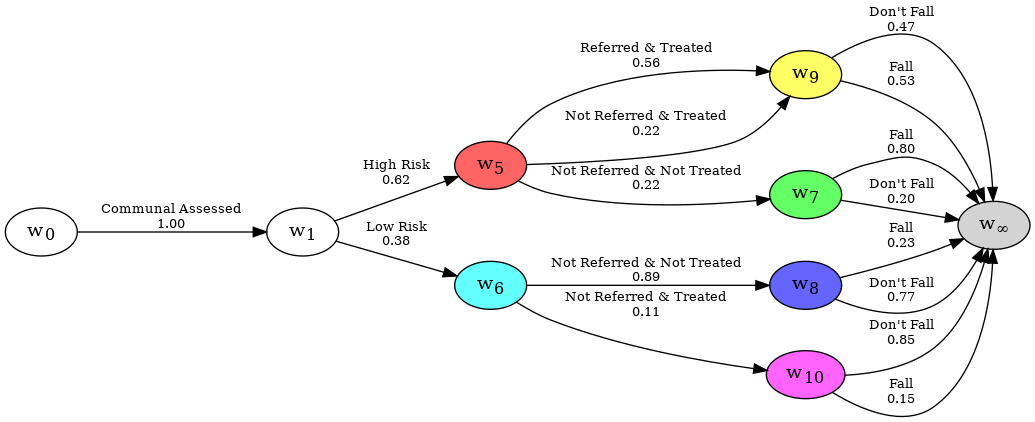

In [36]:
reducer.clear_all_evidence()

reducer.add_certain_edge("w0", "w1", "Communal Assessed")
# or reducer.add_certain_node("w1")
reducer.graph.create_figure()